<a href="https://colab.research.google.com/github/shreyakabra/Zeotap-Assignment/blob/main/Shreya_Kabra_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()  # This will open a file dialog to upload the ZIP file


Saving Zeoptap_Assignment.zip to Zeoptap_Assignment.zip


In [3]:
import zipfile
import os

# Specify the zip file name
zip_file = "Zeoptap_Assignment.zip"  # Replace with the correct file name if different

# Extract the zip file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("Zeoptap_Assignment")

# Check the extracted files
os.listdir("Zeoptap_Assignment")


['Zeoptap_Assignment']

In [7]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Load the datasets
customers = pd.read_csv("Zeoptap_Assignment/Zeoptap_Assignment/Customers.csv")
products = pd.read_csv("Zeoptap_Assignment/Zeoptap_Assignment/Products.csv")
transactions = pd.read_csv("Zeoptap_Assignment/Zeoptap_Assignment/Transactions.csv")

Task 3: Customer Segmentation / Clustering

In [8]:
# Preprocess transaction data
customer_transactions = transactions.groupby("CustomerID").agg({
    "Quantity": "sum",
    "TotalValue": "sum"
}).reset_index()

In [9]:
# Merge customer and transaction data
customer_profiles = pd.merge(customers, customer_transactions, on="CustomerID", how="inner")

In [10]:
# Feature scaling for clustering
scaler = StandardScaler()
profile_features = scaler.fit_transform(customer_profiles[["Quantity", "TotalValue"]])

In [16]:
# Perform clustering
cluster_metrics = []
cluster_labels = {}
centroids = {}

for n_clusters in range(2, 11):  # Loop through cluster counts from 2 to 10
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(profile_features)
    db_index = davies_bouldin_score(profile_features, labels)
    cluster_metrics.append((n_clusters, db_index))
    cluster_labels[n_clusters] = labels
    centroids[n_clusters] = kmeans.cluster_centers_

In [17]:
# Print clustering metrics
print("Davies-Bouldin Index for different cluster counts:")
for n_clusters, db_index in cluster_metrics:
    print(f"{n_clusters} Clusters: DB Index = {db_index:.2f}")

Davies-Bouldin Index for different cluster counts:
2 Clusters: DB Index = 0.63
3 Clusters: DB Index = 0.71
4 Clusters: DB Index = 0.72
5 Clusters: DB Index = 0.78
6 Clusters: DB Index = 0.82
7 Clusters: DB Index = 0.88
8 Clusters: DB Index = 0.94
9 Clusters: DB Index = 0.88
10 Clusters: DB Index = 0.81


In [20]:
# Identify the best number of clusters
best_cluster = min(cluster_metrics, key=lambda x: x[1])  # Minimum Davies-Bouldin Index
optimal_clusters, best_db_index = best_cluster

print(f"\nOptimal Clusters: {optimal_clusters}, Best DB Index: {best_db_index:.2f}")


Optimal Clusters: 2, Best DB Index: 0.63


In [21]:
# Assign clusters to customer profiles
customer_profiles["Cluster"] = cluster_labels[optimal_clusters]
optimal_centroids = centroids[optimal_clusters]

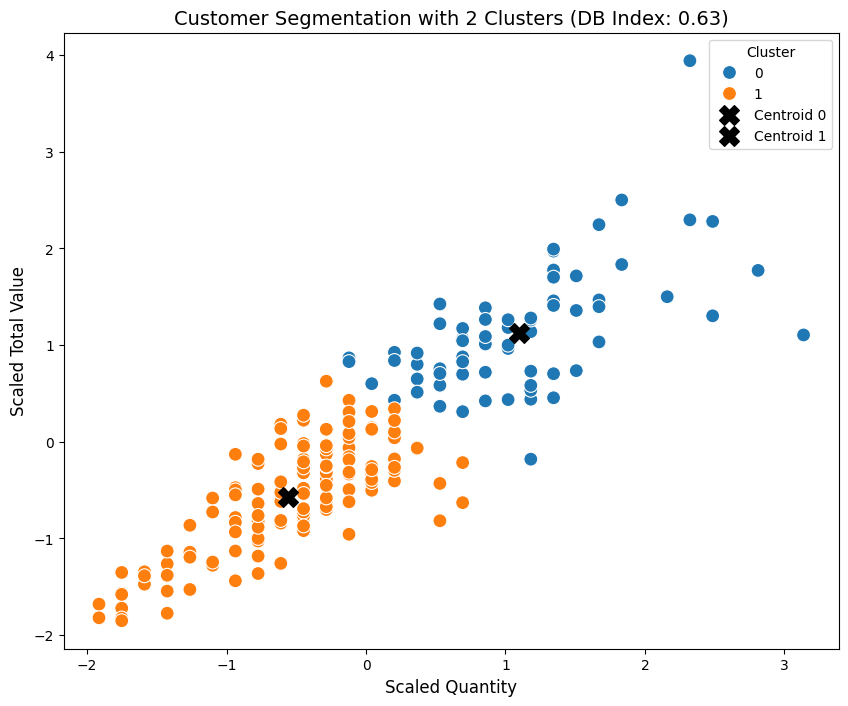

In [22]:
# Enhanced Visualization
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=profile_features[:, 0],  # Scaled Quantity
    y=profile_features[:, 1],  # Scaled Total Value
    hue=customer_profiles["Cluster"],
    palette="tab10",
    s=100
)
# Add centroids
for i, centroid in enumerate(optimal_centroids):
    plt.scatter(centroid[0], centroid[1], s=200, c='black', marker='X', label=f'Centroid {i}')
plt.title(f"Customer Segmentation with {optimal_clusters} Clusters (DB Index: {best_db_index:.2f})", fontsize=14)
plt.xlabel("Scaled Quantity", fontsize=12)
plt.ylabel("Scaled Total Value", fontsize=12)
plt.legend(title="Cluster", fontsize=10)
plt.show()

In [23]:
# Save clustering results
customer_profiles.to_csv("Shreya_Kabra_Clustering.csv", index=False)